In [1]:
import pandas as pd
import numpy as np
import util

# feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import ipywidgets as widgets
from IPython.display import display


# Movie Recomendation System

## Methodology

1. Data Preprocessing: Filter movies with significant high ratings. Clean and normalize movie titles. Convert titles into numerical feature vectors using techniques like bigram representation.

2. Movie Search and Selection: Prompt user to enter a movie title. Retrieve details of the searched movie. Identify users who rated it highly. Collect other highly rated movies by those users.

3. Recommendation Score Calculation: Calculate common score or similarity between the searched movie and other movies based on user ratings. Consider the percentage of users who liked both movies.

4. Generate Movie Recommendations: Sort movies based on recommendation scores. Present the top recommended movies to the user.

In [2]:
movie = pd.read_csv("/Users/nontanatto/Desktop/movie rec/ml-25m/movies.csv")
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [3]:
rating = pd.read_csv("/Users/nontanatto/Desktop/movie rec/ml-25m/ratings.csv")
rating

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [4]:
util.recommend_movies(movie, rating, 1)

,recommend score,common score,Overall Score,movieId,title,genres,cleaned title
0,1.000000,0.124728,8.017414,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
3021,0.280648,0.053706,5.225654,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 2 1999
2264,0.110539,0.025091,4.405452,2355,"Bug's Life, A (1998)",Adventure|Animation|Children|Comedy,Bug s Life A 1998
14813,0.152960,0.035131,4.354038,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,Toy Story 3 2010
4780,0.235147,0.070811,3.320783,4886,"Monsters, Inc. (2001)",Adventure|Animation|Children|Comedy|Fantasy,Monsters Inc 2001
580,0.216618,0.067513,3.208539,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,Aladdin 1992
6258,0.228139,0.072268,3.156862,6377,Finding Nemo (2003),Adventure|Animation|Children|Comedy,Finding Nemo 2003
587,0.179400,0.059977,2.991150,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,Beauty and the Beast 1991
8246,0.203504,0.068453,2.972889,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,Incredibles The 2004
359,0.253411,0.085764,2.954762,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,Lion King The 1994


    From above 
    reccomendation score: Show how related of this movie to the one you search
    common score: show how common of the particular movie that people like it
    Overall Score: Higher score higher recommendation of themovie
    
   **Note: All function that calculate these score can be found in $util.py$

# Create search engine

## Widget Building

In [5]:
#vectorizer = TfidfVectorizer(ngram_range = (1, 2))
#tfidf = vectorizer.fit_transform(movie["cleaned title"])
movie['cleaned title'] = movie['title'].apply(util.clean_title)
vectorizer = TfidfVectorizer(ngram_range = (1, 2))
tfidf = vectorizer.fit_transform(movie["cleaned title"])

In [6]:
# search engine do TF*idf
# invers Document Frequency -> how unique of particular word
def search(title):
    
    title = util.clean_title(title)
    query_vector = vectorizer.transform([title])

    similarity = cosine_similarity(query_vector, tfidf).flatten()
    index = np.argpartition(similarity, -5)[-5:]
    print(index)
    return movie.iloc[index][::-1]

In [7]:
# show the filling box
movie_input = widgets.Text(
    value="",
    description = "Movie Title",
    disabled = False
)

In [8]:
recommendation_list = widgets.Output()

In [13]:
def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        print(data)
        print(title)
        if len(title) > 5:
            result = search(title)
            movie_id = result.iloc[0]['movieId']
            display(util.recommend_movies(movie, rating, movie_id)[['Overall Score', 'title', 'genres']])



In [14]:
movie_input.observe(on_type, names='value')

display(movie_input, recommendation_list)

Text(value='iron man', description='Movie Title')

Output(outputs=({'output_type': 'stream', 'text': "{'name': 'value', 'old': 'iron m', 'new': 'iron man', 'owne…

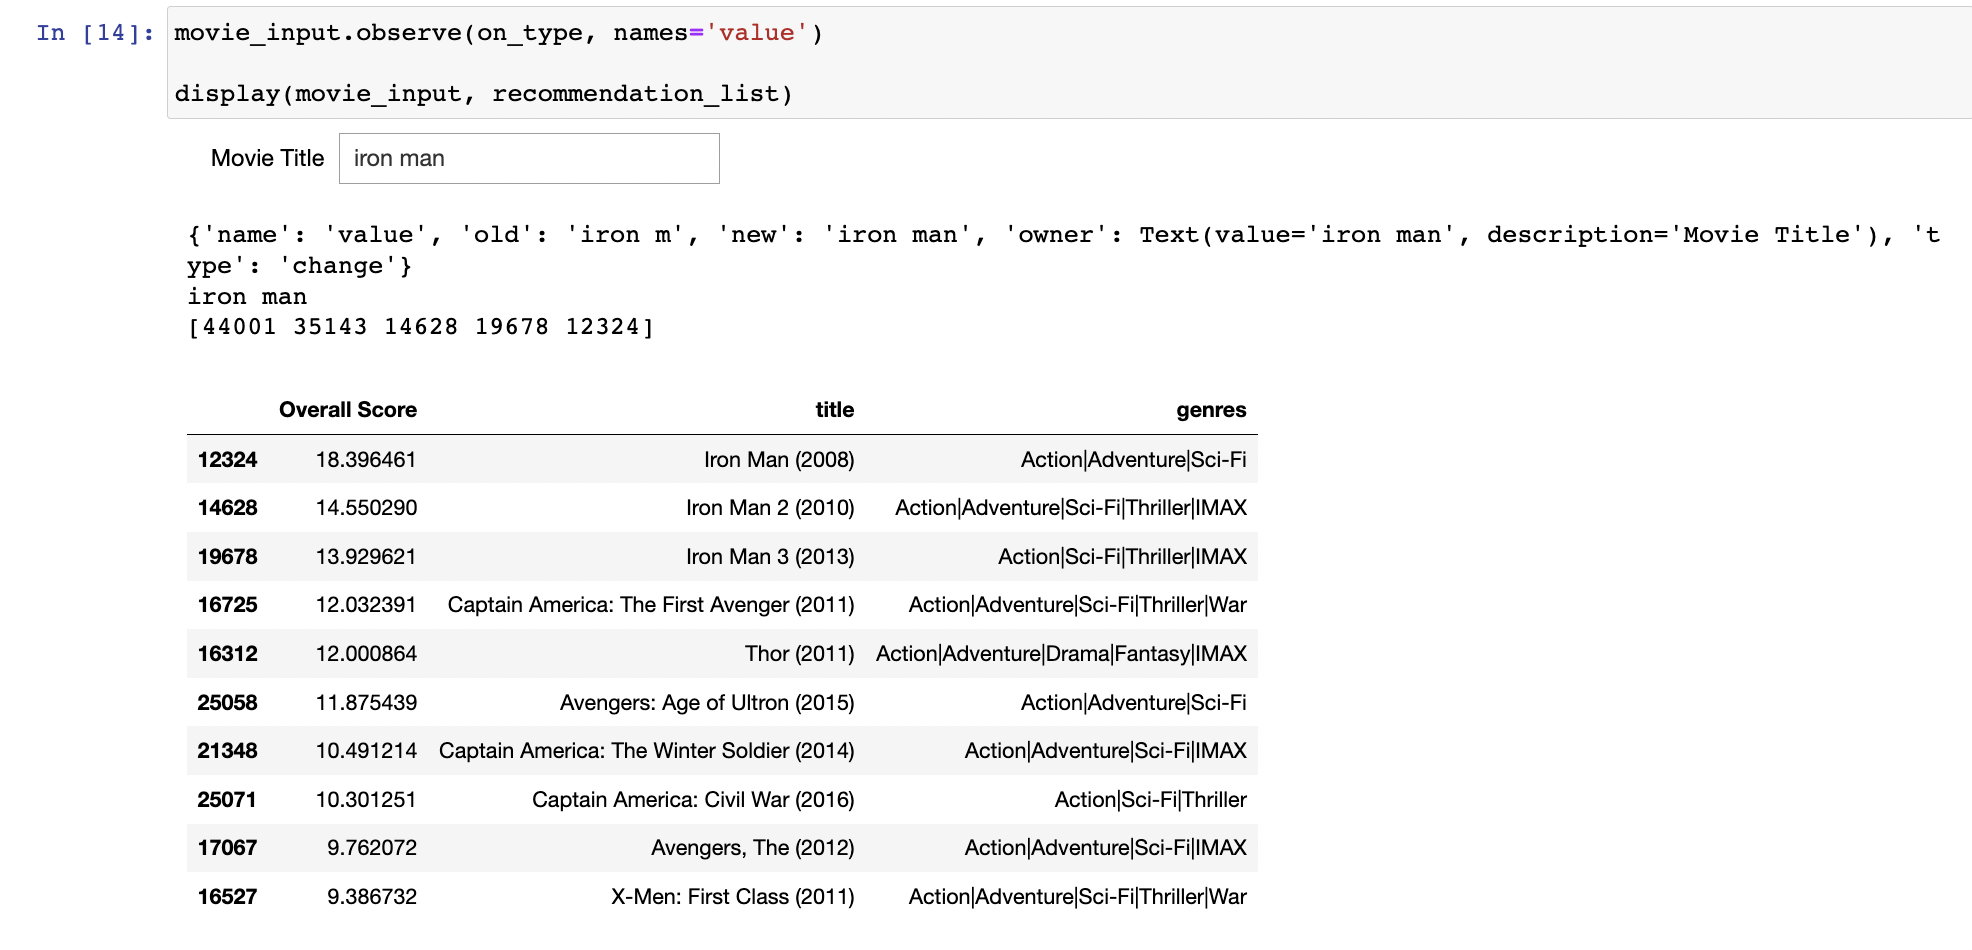

    Future work: Next is to do s.th better for reccomendation system such as consider genre